https://rpg.stackexchange.com/

In [1]:
# Get our post reader and open the xml file
from post_parser_record import PostParserRecord
post_reader = PostParserRecord("data/Posts.xml")
#post_reader = PostParserRecord("data/Posts_Small.xml")

In [4]:
# imports
import nltk
import random
from nltk.corpus import stopwords
from nltk.corpus.reader.tagged import word_tokenize
from nltk import tokenize
import re, string
import matplotlib.pylab as plt
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thoeu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thoeu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Average number of words in answers
number_answers = len(post_reader.map_just_answers.keys())
number_words = 0
number_sentences = 0
# loop through every answer in the map via answer_id
for answer_id in post_reader.map_just_answers:
  answer = post_reader.map_just_answers[answer_id]
  number_words += len(answer.body.split(" "))
  number_sentences += len(tokenize.sent_tokenize(answer.body))

print("The average number of words for the answers are: " + str(number_words/number_answers))
print("The average number of sentences for the answers are: " + str(number_sentences/number_answers))

# Average number of words in questions
number_answers = len(post_reader.map_questions.keys())
number_words = 0
number_sentences = 0
# loop through every answer in the map via answer_id
for answer_id in post_reader.map_questions:
  question = (post_reader.map_questions[answer_id].title + " " + post_reader.map_questions[answer_id].body)
  number_words += len(question.split(" "))
  number_sentences += len(tokenize.sent_tokenize(question))

print("The average number of words for the questions are: " + str(number_words/number_answers))
print("The average number of sentences for the answers are: " + str(number_sentences/number_answers))

The average number of words for the answers are: 270.31295508546026
The average number of sentences for the answers are: 8.837414731355867
The average number of words for the questions are: 168.64594026812208
The average number of sentences for the answers are: 6.204773352392091


In [10]:
# Average number of answers given to each question
number_questions = len(post_reader.map_questions)
number_answers = 0
for answer_id in post_reader.map_questions:
  number_answers += post_reader.map_questions[answer_id].answer_count

print("The average number of answers given to each question is " + str(number_answers/number_questions))

number_questions = 0
number_answers = 0
for answer_id in post_reader.map_questions:
  question = post_reader.map_questions[answer_id]
  if(question.answer_count != 0):
    number_questions += 1
    number_answers += question.answer_count

print("The average number of answers given to each question is " + str(number_answers/number_questions))

# Questions without answers
no_answers = 0
for answer_id in post_reader.map_questions:
  if(post_reader.map_questions[answer_id].answer_count == 0):
    no_answers += 1
print(str(no_answers) + " questions have no answers.")

# Questions with an accepted answer
accepted_answers = 0
# go through every question and check if it has an accepted answer, add to count if so
for answer_id in post_reader.map_questions:
  if(post_reader.map_questions[answer_id].accepted_answer_id != None):
    accepted_answers += 1

print(str(accepted_answers) + " questions have accepted answers.")

The average number of answers given to each question is 2.2605418751218243
The average number of answers given to each question is 2.3673932273356164
2084 questions have no answers.
31228 questions have accepted answers.


(9, 24, 28, 34, 72, 82, 330, 3183, 21380, 198770, 198776, 198781, 198790, 198797, 198799, 198803, 198814, 198819, 198845)
(656, 52311, 1089, 17706, 44173, 17706, 2773, 2263, 561, 120698, 11384, 4965, 28117, 2536, 28249, 53860, 120698, 120698, 326104)


C:\Users\Thoeu\AppData\Local\Temp\ipykernel_1012\704138562.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


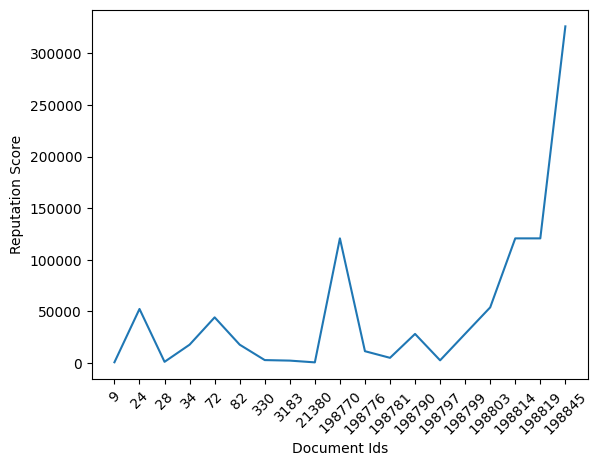

In [24]:
# Get the first 10 accepted answers, then the last 10 accepted answers
# First: 3183, 9, 34, 28, 302, 24, 330, 72, 82, 21380
# Last: 198845, 198819, 198814, 198803, 198799, 198797, 198790, 198781, 198776, 198770
doc_reputations = {3183: 2263, 9: 656, 34: 17706, 28: 1089, 24: 52311, 330: 2773, 72: 44173, 82: 17706, 21380: 561, 198845: 326104, 198819: 120698, 198814: 120698, 198803: 53860, 198799: 28249, 198797: 2536, 198790: 28117, 198781: 4965, 198776: 11384, 198770: 120698}
sorted_docs = sorted(doc_reputations.items())
x, y = zip(*sorted_docs)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y)
plt.xlabel("Document Ids")
plt.ylabel("Reputation Score")
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation=45)
fig.show()

In [18]:
def tokenize(text):
    token_words = re.sub("<.*?>|\\n|&quot;", " ", text.lower())
    token_words = word_tokenize(token_words.translate(str.maketrans('', '', string.punctuation)))
    return token_words

# Posts:
post1 = post_reader.map_questions[198565]
post2 = post_reader.map_questions[198551]

# Title:
print("Title: " + post1.title.lower())
print("Title: " + post2.title.lower())

post1_title = post1.title.lower().split(" ")
post2_title = post2.title.lower().split(" ")

title_common = [word for word in post1_title if word in post2_title]
print("Title common words: " + str(title_common))
print(str(len(title_common)) + " common words between the titles.")
# Body:
post1_body = tokenize(post1.body)
post2_body = tokenize(post2.body)

body_common = [word for word in post1_body if word in post2_body]
print("Body common words: " + str(body_common))
print(str(len(body_common)) + " common words between the bodies.")


Title: an expanded take on stars druid dragon form and polymorph
Title: stars druid dragon form and polymorph
Title common words: ['stars', 'druid', 'dragon', 'form', 'and', 'polymorph']
6 common words between the titles.
Body common words: ['the', 'in', 'the', 'a', 'a', 'a', 'into', 'a', 'then', 'cast', 'on', 'the', 'the', 'a', 'the', 'of', 'polymorph', 'with', 'a', 'polymorph', 'can', 'with', 'a', 'cast', 'on', 'a', 'and', 'then', 'a', 'the', 'into', 'a', 'the', 'cast', 'in', 'is', 'if', 'then', 'the', 'is', 'the', 'in', 'a', 'a', 'with', 'the', 'polymorph', 'can', 'and', 'is', 'a', 'polymorph', 'the', 'circle', 'of', 'stars', 'druid', 'in', 'starry', 'form', 'stars', 'and', 'on', 'a', 'the', 'starry', 'form', 'a', 'a', 'the', 'polymorph', 'the', 'the']
73 common words between the bodies.


C:\Users\Thoeu\AppData\Local\Temp\ipykernel_18132\178035186.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


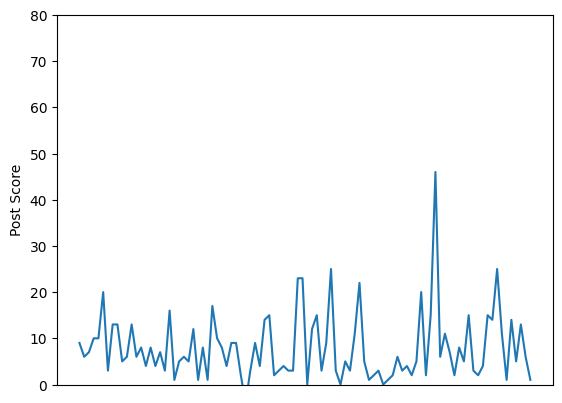

In [84]:
import datetime
random_questions = random.sample(sorted(post_reader.map_questions), 100)
date_to_score = {}
for answer_id in random_questions:
    post = post_reader.map_questions[answer_id]
    creation_date = post.creation_date.split("T")[0]
    score = post.score
    date_to_score[creation_date] = score
dates = sorted(date_to_score, key=lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
scores = []
for date in dates:
    scores.append(date_to_score[date])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(scores)
plt.xlabel("Document Dates")
plt.ylabel("Post Score")
ax.set_xticks(np.arange(len(dates)))
plt.ylim(0, 80)
ax.get_xaxis().set_visible(False)
fig.show()